# Credit Risk

Credit has played a key role in the economy for centuries and some form of credit has existed since the beginning of commerce. We'll be working with financial lending data from Lending Club. Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

Each borrower completes a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower's credit score using past historical data and their own data science process to assign an interest rate to the borrower. The interest rate is the percent in addition to the requested loan amount the borrower has to pay back. You can read more about the interest rate that Lending Club assigns here. Lending Club also tries to verify all the information the borrower provides but it can't verify all of the information (usually for regulation reasons).

A higher interest rate means that the borrower is a risk and more unlikely to pay back the loan. While a lower interest rate means that the borrower has a good credit history and is more likely to pay back the loan. The interest rates range from 5.32% all the way to 30.99% and each borrower is given a grade according to the interest rate they were assigned. If the borrower accepts the interest rate, then the loan is listed on the Lending Club marketplace.

Investors are primarily interested in receiving a return on their investments. Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower's credit score, the purpose for the loan, and other information from the application. Once they're ready to back a loan, they select the amount of money they want to fund. Once a loan's requested amount is fully funded, the borrower receives the money they requested minus the origination fee that Lending Club charges.

The borrower will make monthly payments back to Lending Club either over 36 months or over 60 months. Lending Club redistributes these payments to the investors. This means that investors don't have to wait until the full amount is paid off before they see a return in money. If a loan is fully paid off on time, the investors make a return which corresponds to the interest rate the borrower had to pay in addition to the requested amount. Many loans aren't completely paid off on time and some borrowers default on the loan.

Here's a diagram from Bible Money Matters that sums up the process:
<img src="lending_money.PNG" alt="Alternative text" />

While Lending Club has to be extremely savvy and rigorous with their credit modelling, investors on Lending Club need to be equally as savvy about determining which loans are more likely to be paid off. At first, you may wonder why investors put money into anything but low interest loans. The incentive investors have to back higher interest loans is, well, the higher interest! If investors believe the borrower can pay back the loan, even if he or she has a weak financial history, then investors can make more money through the larger additional amount the borrower has to pay.

Most investors use a portfolio strategy to invest small amounts in many loans, with healthy mixes of low, medium, and interest loans. In this course, we'll focus on the mindset of a conservative investor who only wants to invest in the loans that have a good chance of being paid off on time. To do that, we'll need to first understand the features in the dataset and then experiment with building machine learning models that reliably predict if a loan will be paid off or not.

# Imports

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Functions

In [43]:
def value_counts_plot(df, column, title):
    plt.figure(figsize=(20,10))
    round(df[column].value_counts(dropna=False, normalize=True)*100, 2).plot(kind="bar")
    plt.title(title)
    plt.xlabel('%')
    plt.ylabel('Value')
    plt.legend()   

# Read Datasets

In [44]:
loans_2007 = pd.read_csv("loans_2007.csv")

C:\Users\rspaimoc\AppData\Local\Temp\ipykernel_13768\2839191627.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  loans_2007 = pd.read_csv("loans_2007.csv")


In [45]:
loans_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


## First 18 columns description


- **name	dtype	first value	description**
- **id**	object	1077501	A unique LC assigned ID for the loan listing.
- **member_id**	float64	1.2966e+06	A unique LC assigned Id for the borrower member.
- **loan_amnt**	float64	5000	The listed amount of the loan applied for by the borrower.
- **funded_amnt**	float64	5000	The total amount committed to that loan at that point in time.
- **funded_amnt_inv**	float64	49750	The total amount committed by investors for that loan at that point in time.
- **term**	object	36 months	The number of payments on the loan. Values are in months and can be either 36 or 60.
- **int_rate**	object	10.65%	Interest Rate on the loan
- **installment**	float64	162.87	The monthly payment owed by the borrower if the loan originates.
- **grade**	object	B	LC assigned loan grade
- **sub_grade**	object	B2	LC assigned loan subgrade
- **emp_title**	object	NaN	The job title supplied by the Borrower when applying for the loan.
- **emp_length**	object	10+ years	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- **home_ownership**	object	RENT	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- **annual_inc**	float64	24000	The self-reported annual income provided by the borrower during registration.
- **verification_status**	object	Verified	Indicates if income was verified by LC, not verified, or if the income source was verified
- **issue_d**	object	Dec-2011	The month which the loan was funded
- **loan_status**	object	Charged Off	Current status of the loan
- **pymnt_plan**	object	n	Indicates if a payment plan has been put in place for the loan
- **purpose**	object	car	A category provided by the borrower for the loan request.

In [46]:
columns_list = loans_2007.columns.tolist()
len(columns_list)

52

In [47]:
xlsx = pd.ExcelFile("LCDataDictionary.xlsx")
xlsx.sheet_names

['LoanStats', 'browseNotes', 'RejectStats']

In [48]:
loan_stats = pd.read_excel(xlsx, "LoanStats")
browse_notes = pd.read_excel(xlsx, "browseNotes")
reject_stats = pd.read_excel(xlsx, "RejectStats")

In [49]:
loan_stats

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [50]:
browse_notes

,BrowseNotesFile,Description
0,acceptD,The date which the borrower accepted the offer
1,accNowDelinq,The number of accounts on which the borrower i...
2,accOpenPast24Mths,Number of trades opened in past 24 months.
3,addrState,The state provided by the borrower in the loan...
4,all_util,Balance to credit limit on all trades
...,...,...
103,url,URL for the LC page with listing data.
104,verified_status_joint,Indicates if the co-borrowers' joint income wa...
105,zip_code,The first 3 numbers of the zip code provided b...
106,NaN,NaN


In [51]:
reject_stats

,RejectStats File,Description
0,Amount Requested,The total amount requested by the borrower
1,Application Date,The date which the borrower applied
2,Loan Title,The loan title provided by the borrower
3,Risk_Score,"For applications prior to November 5, 2013 the..."
4,Debt-To-Income Ratio,A ratio calculated using the borrower’s total ...
5,Zip Code,The first 3 numbers of the zip code provided b...
6,State,The state provided by the borrower in the loan...
7,Employment Length,Employment length in years. Possible values ar...
8,Policy Code,publicly available policy_code=1\nnew products...


# EDA 

# Data Cleaning

### First Group of Features
After analyzing each column, we can conclude that the following features need to be removed:

- **id:** randomly generated field by Lending Club for unique identification purposes only
- **member_id:** also a randomly generated field by Lending Club for unique identification purposes only
- **funded_amnt:** leaks data from the future (after the loan is already started to be funded)
- **funded_amnt_inv:** also leaks data from the future (after the loan is already started to be funded)
- **grade:** contains redundant information as the interest rate column (int_rate)
- **sub_grade:** also contains redundant information as the interest rate column (int_rate)
- **emp_title:** requires other data and a lot of processing to potentially be useful
- **issue_d:** leaks data from the future (after the loan is already completely funded)

In [52]:
loans_2007.drop(columns=["id", "member_id", "funded_amnt", "funded_amnt_inv", "grade", "sub_grade", "emp_title", "issue_d"], 
                axis=1, inplace=True)

In [53]:
loans_2007

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,6500.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,5000.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Second Group of Features

- **name	dtype	first value	description**
- title	object	Computer	The loan title provided by the borrower
- zip_code	object	860xx	The first 3 numbers of the zip code provided by the borrower in the loan application.
- addr_state	object	AZ	The state provided by the borrower in the loan application
- dti	float64	27.65	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs	float64	0	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- earliest_cr_line	object	Jan-1985	The month the borrower's earliest reported credit line was opened
- inq_last_6mths	float64	1	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- open_acc	float64	3	The number of open credit lines in the borrower's credit file.
- pub_rec	float64	0	Number of derogatory public records
- revol_bal	float64	13648	Total credit revolving balance
- revol_util	object	83.7%	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- total_acc	float64	9	The total number of credit lines currently in the borrower's credit file
- initial_list_status	object	f	The initial listing status of the loan. Possible values are – W, F
- out_prncp	float64	0	Remaining outstanding principal for total amount funded
- out_prncp_inv	float64	0	Remaining outstanding principal for portion of total amount funded by investors
- total_pymnt	float64	5863.16	Payments received to date for total amount funded
- total_pymnt_inv	float64	5833.84	Payments received to date for portion of total amount funded by investors
- total_rec_prncp	float64	5000	Principal received to date

Within this group of columns, we need to drop the following columns:

- **zip_code:** redundant with the addr_state column since only the first 3 digits of the 5-digit zip code are visible (which can only be used to identify the state the borrower lives in)
- **out_prncp:** leaks data from the future, (after the loan already started to be paid off)
- **out_prncp_inv:** also leaks data from the future, (after the loan already started to be paid off)
- **total_pymnt:** also leaks data from the future, (after the loan already started to be paid off)
- **total_pymnt_inv:** also leaks data from the future, (after the loan already started to be paid off)
- **total_rec_prncp:** also leaks data from the future, (after the loan already started to be paid off)

The out_prncp and out_prncp_inv both describe the outstanding principal amount for a loan, which is the remaining amount the borrower still owes. These 2 columns as well as the total_pymnt column describe properties of the loan after it's fully funded and started to be paid off. This information isn't available to an investor before the loan is fully funded and we don't want to include it in our model.

In [54]:
loans_2007.drop(columns=["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], 
                axis=1, inplace=True)

In [55]:
loans_2007

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,171.62,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,649.91,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,357.48,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,67.79,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,82.03,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,6500.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,205.32,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,5000.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,156.39,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Third Group of Features

Let's now move on to the last group of features:

- **name	dtype	first value	description**
- **total_rec_int**	float64	863.16	Interest received to date
- **total_rec_late_fee**	float64	0	Late fees received to date
- **recoveries**	float64	0	post charge off gross recovery
- **collection_recovery_fee**	float64	0	post charge off collection fee
- **last_pymnt_d**	object	Jan-2015	Last month payment was received
- **last_pymnt_amnt**	float64	171.62	Last total payment amount received
- **last_credit_pull_d**	object	Jun-2016	The most recent month LC pulled credit for this loan
- **collections_12_mths_ex_med**	float64	0	Number of collections in 12 months excluding medical collections
- **policy_code**	float64	1	publicly available policy_code=1 new products not publicly available policy_code=2
- **application_type**	object	INDIVIDUAL	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- **acc_now_delinq**	float64	0	The number of accounts on which the borrower is now delinquent.
- **chargeoff_within_12_mths**	float64	0	Number of charge-offs within 12 months
- **delinq_amnt**	float64	0	The past-due amount owed for the accounts on which the borrower is now delinquent.
- **pub_rec_bankruptcies**	float64	0	Number of public record bankruptcies
- **tax_liens**	float64	0	Number of tax liens

In the last group of columns, we need to drop the following columns:

- **total_rec_int:** leaks data from the future, (after the loan has started to be paid off),
- **total_rec_late_fee:** leaks data from the future, (after the loan has started to be paid off),
- **recoveries:** leaks data from the future, (after the loan has started to be paid off),
- **collection_recovery_fee:** leaks data from the future, (after the loan has started to be paid off),
- **last_pymnt_d:** leaks data from the future, (after the loan has started to be paid off),
- **last_pymnt_amnt:** leaks data from the future, (after the loan has started to be paid off).

All of these columns leak data from the future, meaning that they're describing aspects of the loan after it's already been fully funded and started to be paid off by the borrower.

In [56]:
loans_2007.drop(columns=["total_rec_int", "total_rec_late_fee", "recoveries",
                         "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], 
                axis=1, inplace=True)

In [57]:
loans_2007

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,...,f,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,...,f,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,Current,n,...,f,Jun-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,36 months,9.33%,80.69,< 1 year,RENT,110000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,May-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,6500.0,36 months,8.38%,204.84,< 1 year,NONE,NaN,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,Aug-2007,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42535,5000.0,36 months,7.75%,156.11,10+ years,MORTGAGE,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,n,...,f,Feb-2015,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove columns

In [58]:
loans_2007.columns.tolist()

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

## Learn
By becoming familiar with the columns in the dataset, we were able to reduce the number of columns from 52 to 32 columns. We now need to decide on a target column that we want to use for modeling.

We should use the loan_status column, since it's the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. Currently, this column contains text values and we need to convert it to a numerical value for training a model. Let's explore the different values in this column and come up with a strategy for converting the values in this column.

In [59]:
loans_2007["loan_status"].value_counts(dropna=False)

Fully Paid                                             33136
Charged Off                                             5634
Does not meet the credit policy. Status:Fully Paid      1988
Current                                                  961
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        24
In Grace Period                                           20
Late (16-30 days)                                          8
Default                                                    3
NaN                                                        3
Name: loan_status, dtype: int64

In [60]:
round(loans_2007["loan_status"].value_counts(dropna=False, normalize=True)*100, 2)

Fully Paid                                             77.90
Charged Off                                            13.24
Does not meet the credit policy. Status:Fully Paid      4.67
Current                                                 2.26
Does not meet the credit policy. Status:Charged Off     1.79
Late (31-120 days)                                      0.06
In Grace Period                                         0.05
Late (16-30 days)                                       0.02
Default                                                 0.01
NaN                                                     0.01
Name: loan_status, dtype: float64

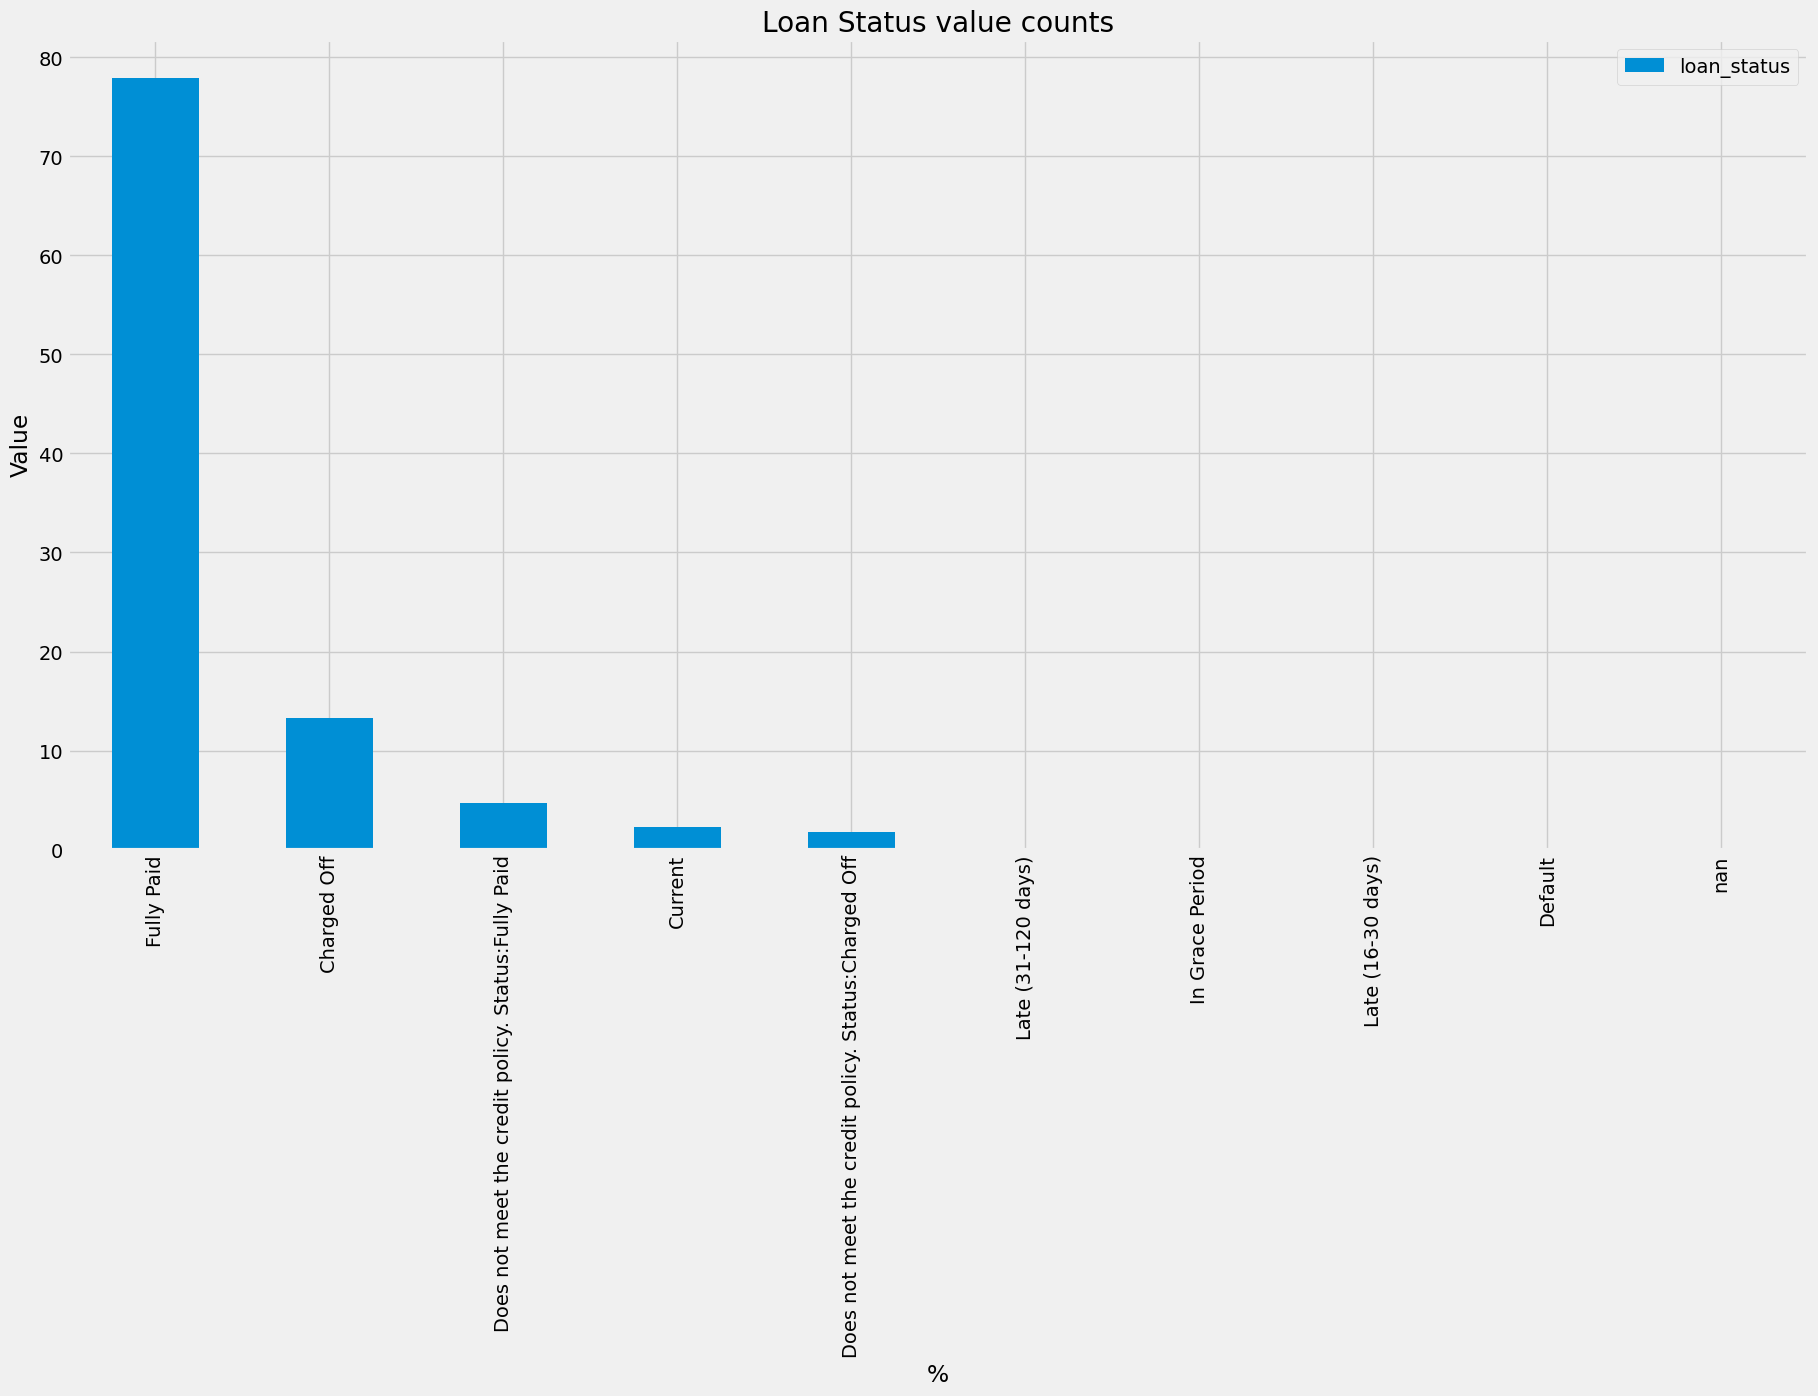

In [61]:
value_counts_plot(loans_2007, "loan_status", "Loan Status value counts")

| **Loan Status** | **Count**   | **Meaning** |
|------|------|------|
| Fully Paid |	33136 |	Loan has been fully paid off.| 
| Charged Off	 |	5634 |	Loan for which there is no longer a reasonable expectation of further payments.| 
| Does not meet the credit policy. Status:Fully Paid |	1988 |	While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.| 
| Does not meet the credit policy. Status:Charged Off |	761 |		While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.| 
| In Grace Period |	20 |	The loan is past due but still in the grace period of 15 days.| 
| Late (16-30 days) |	8 |	Loan hasn't been paid in 16 to 30 days (late on the current payment).| 
| Late (31-120 days) |	24 | Loan hasn't been paid in 31 to 120 days (late on the current payment).| 
| Current |	961 |	Loan is up to date on current payments.| 
| Default |	3 | Loan is defaulted on and no payment has been made for more than 121 days.| 

From the investor's perspective, we're interested in trying to predict whether loans will be paid off on time. Only the **Fully Paid and Charged Off** values describe the final outcome of the loan. The other values describe loans that are still ongoing and where the jury is still out on if the borrower will pay back the loan on time or not. While the Default status resembles the Charged Off status, in Lending Club's eyes, loans that are charged off have essentially no chance of being repaid while default ones have a small chance. You can read about the difference here.

Since we're interested in being able to predict which of these **2** values a loan will fall under, we can treat the problem as a **binary classification** one. Let's remove all the loans that don't contain either Fully Paid or Charged Off as the loan's status. After the removal of the loan statuses, then transform the **Fully Paid values to 1** for the positive case and the **Charged Off values to 0** for the negative case. 

In [63]:
loans_2007["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [64]:
loans_2007[loans_2007["loan_status"].isin(["Fully Paid", "Charged Off"])]["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [65]:
loans_2007 = loans_2007[loans_2007.loan_status.isin(['Fully Paid', 'Charged Off'])]

In [67]:
loans_2007.replace({"loan_status": {
        'Fully Paid': 1,
        'Charged Off': 0
    }}, inplace=True)

C:\Users\rspaimoc\AppData\Local\Temp\ipykernel_13768\3517346445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_2007.replace({"loan_status": {


In [72]:
loans_2007["loan_status"].value_counts(dropna=False)

1    33136
0     5634
Name: loan_status, dtype: int64

In [75]:
round(loans_2007["loan_status"].value_counts(dropna=False, normalize=True)*100)

1    85.0
0    15.0
Name: loan_status, dtype: float64

## Remove unique value columns

In [76]:
drop_columns = []

In [77]:
for column in loans_2007.columns.tolist():
    non_null = loans_2007[column].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique <= 1:
        drop_columns.append(column)

In [78]:
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [79]:
loans_2007["pymnt_plan"].value_counts(dropna=False)

n    38770
Name: pymnt_plan, dtype: int64

In [80]:
loans_2007.drop(columns=drop_columns, axis=1, inplace=True)

C:\Users\rspaimoc\AppData\Local\Temp\ipykernel_13768\2984973428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans_2007.drop(columns=drop_columns, axis=1, inplace=True)


In [81]:
loans_2007

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,credit_card,...,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Jun-2016,0.0
1,2500.0,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,car,...,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2013,0.0
2,2400.0,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,small_business,...,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,Jun-2016,0.0
3,10000.0,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,other,...,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0
5,5000.0,36 months,7.90%,156.46,3 years,RENT,36000.0,Source Verified,1,wedding,...,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,Jan-2016,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36 months,8.07%,78.42,4 years,MORTGAGE,110000.0,Not Verified,1,home_improvement,...,0.0,Nov-1990,0.0,13.0,0.0,7274.0,13.1%,40.0,Jun-2010,NaN
39782,8500.0,36 months,10.28%,275.38,3 years,RENT,18000.0,Not Verified,1,credit_card,...,1.0,Dec-1986,1.0,6.0,0.0,8847.0,26.9%,9.0,Jul-2010,NaN
39783,5000.0,36 months,8.07%,156.84,< 1 year,MORTGAGE,100000.0,Not Verified,1,debt_consolidation,...,0.0,Oct-1998,0.0,11.0,0.0,9698.0,19.4%,20.0,Jun-2007,NaN
39784,5000.0,36 months,7.43%,155.38,< 1 year,MORTGAGE,200000.0,Not Verified,1,other,...,0.0,Nov-1988,0.0,17.0,0.0,85607.0,0.7%,26.0,Jun-2007,NaN
